# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [212]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [213]:
nama_file = 'submission_machine_learning.csv'
df_hasil_clustering = pd.read_csv(nama_file)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [214]:
# Memisahkan fitur (X) dan target (y)
X = df_hasil_clustering.drop(columns=['Name','Date of Admission','Doctor','Hospital', 'Discharge Date','Test Results','Room Number'])  # Menghapus kolom target
y = df_hasil_clustering['Test Results']  # Menyimpan kolom target

label_encoder = LabelEncoder()

X_encoded = X.apply(label_encoder.fit_transform)
y_encoded = label_encoder.fit_transform(y)

# Membagi dataset menjadi training set dan testing set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.30, random_state=42)

# Menampilkan dimensi data latih dan data uji
print(f'Dimensi data latih (X_train): {X_train.shape}')
print(f'Dimensi data uji (X_test): {X_test.shape}')

Dimensi data latih (X_train): (38850, 8)
Dimensi data uji (X_test): (16650, 8)


In [215]:
X_train

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication
49562,24,0,4,2,3,19326,1,1
4496,42,0,5,2,3,49534,2,1
5460,53,1,1,3,3,36921,2,0
27971,37,0,4,1,0,15448,2,2
53920,23,1,0,3,2,39564,0,4
...,...,...,...,...,...,...,...,...
44732,14,0,5,2,2,27441,0,3
54343,19,1,3,4,4,1392,1,4
38158,11,0,5,5,4,9720,1,2
860,63,1,0,1,0,12248,1,0


In [216]:
y_train

array([2, 0, 0, ..., 1, 0, 2], shape=(38850,))

In [217]:
quality_label = LabelEncoder()
df_hasil_clustering['Test Results'] = quality_label.fit_transform(df_hasil_clustering['Test Results'])
df_hasil_clustering['Test Results'].value_counts()

Test Results
0    18627
2    18517
1    18356
Name: count, dtype: int64

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [251]:
# Inisialisasi model Random Forest tanpa hyperparameter tuning
rf = RandomForestClassifier(random_state=45)
rf.fit(X_train, y_train)
 
# Evaluasi awal model tanpa tuning
initial_score = rf.score(X_test, y_test)
print(f"Initial accuracy on test set (without tuning): {initial_score:.2f}")

Initial accuracy on test set (without tuning): 0.42


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.39
F1-Score: 0.39
Precision: 0.39
Recall: 0.39


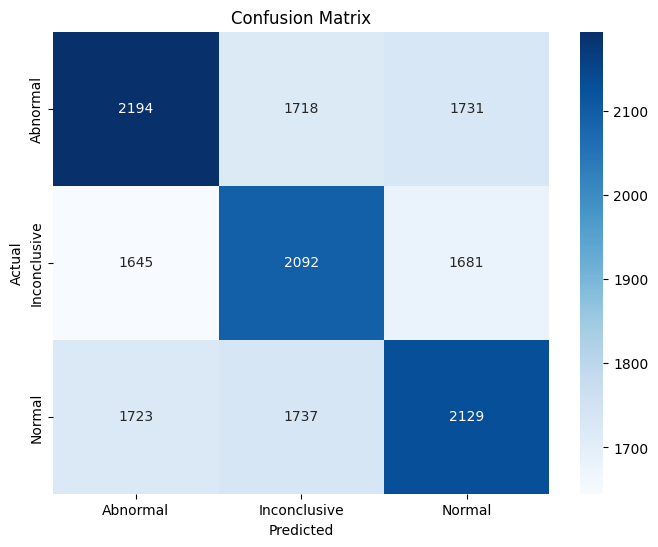


Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.39      0.39      0.39      5643
Inconclusive       0.38      0.39      0.38      5418
      Normal       0.38      0.38      0.38      5589

    accuracy                           0.39     16650
   macro avg       0.39      0.39      0.39     16650
weighted avg       0.39      0.39      0.39     16650



In [252]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Menggunakan 'weighted' jika ada ketidakseimbangan kelas
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [253]:
# Definisikan parameter grid untuk Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
 
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Grid Search): {grid_search.best_params_}")
best_rf_grid = grid_search.best_estimator_
 
# Evaluasi performa model pada test set
grid_search_score = best_rf_grid.score(X_test, y_test)
print(f"Accuracy after Grid Search: {grid_search_score:.2f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters (Grid Search): {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy after Grid Search: 0.43


In [254]:
# Definisikan ruang pencarian untuk Random Search
param_dist = {
    'n_estimators': np.linspace(100, 500, 5, dtype=int),
    'max_depth': np.linspace(10, 50, 5, dtype=int),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
 
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Random Search): {random_search.best_params_}")
best_rf_random = random_search.best_estimator_
 
# Evaluasi performa model pada test set
random_search_score = best_rf_random.score(X_test, y_test)
print(f"Accuracy after Random Search: {random_search_score:.2f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters (Random Search): {'n_estimators': np.int64(200), 'min_samples_split': 2, 'max_depth': np.int64(30), 'criterion': 'gini'}
Accuracy after Random Search: 0.42


In [255]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy']
}
 
# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)
 
# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_
 
# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [256]:
# Evaluasi ulang model terbaik dari Grid Search
y_pred_grid = best_rf_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
f1_grid = f1_score(y_test, y_pred_grid, average='weighted')
precision_grid = precision_score(y_test, y_pred_grid, average='weighted')
recall_grid = recall_score(y_test, y_pred_grid, average='weighted')

print("\nPerformance Metrics (Grid Search):")
print(f"Accuracy: {accuracy_grid:.2f}")
print(f"F1-Score: {f1_grid:.2f}")
print(f"Precision: {precision_grid:.2f}")
print(f"Recall: {recall_grid:.2f}")


Performance Metrics (Grid Search):
Accuracy: 0.43
F1-Score: 0.43
Precision: 0.43
Recall: 0.43


In [257]:
# Evaluasi ulang model terbaik dari Random Search
y_pred_random = best_rf_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random, average='weighted')
precision_random = precision_score(y_test, y_pred_random, average='weighted')
recall_random = recall_score(y_test, y_pred_random, average='weighted')

print("\nPerformance Metrics (Random Search):")
print(f"Accuracy: {accuracy_random:.2f}")
print(f"F1-Score: {f1_random:.2f}")
print(f"Precision: {precision_random:.2f}")
print(f"Recall: {recall_random:.2f}")


Performance Metrics (Random Search):
Accuracy: 0.42
F1-Score: 0.42
Precision: 0.42
Recall: 0.42


In [258]:
# Evaluasi ulang model terbaik dari Bayesian Optimization
y_pred_bayes = best_rf_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
f1_bayes = f1_score(y_test, y_pred_bayes, average='weighted')
precision_bayes = precision_score(y_test, y_pred_bayes, average='weighted')
recall_bayes = recall_score(y_test, y_pred_bayes, average='weighted')

print("\nPerformance Metrics (Bayesian Optimization):")
print(f"Accuracy: {accuracy_bayes:.2f}")
print(f"F1-Score: {f1_bayes:.2f}")
print(f"Precision: {precision_bayes:.2f}")
print(f"Recall: {recall_bayes:.2f}")


Performance Metrics (Bayesian Optimization):
Accuracy: 0.42
F1-Score: 0.42
Precision: 0.42
Recall: 0.42


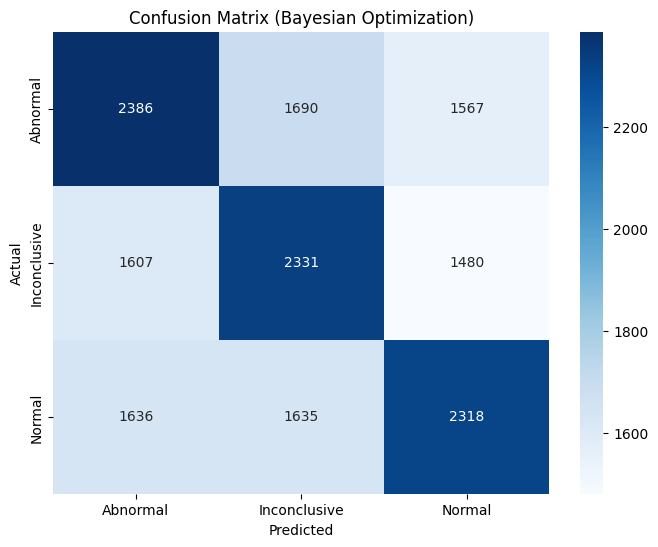


Classification Report (Bayesian Optimization):
              precision    recall  f1-score   support

    Abnormal       0.42      0.42      0.42      5643
Inconclusive       0.41      0.43      0.42      5418
      Normal       0.43      0.41      0.42      5589

    accuracy                           0.42     16650
   macro avg       0.42      0.42      0.42     16650
weighted avg       0.42      0.42      0.42     16650



In [259]:
# Visualisasi Confusion Matrix untuk model terbaik (misalnya, dari Bayesian Optimization)
conf_matrix_bayes = confusion_matrix(y_test, y_pred_bayes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bayes, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Bayesian Optimization)')
plt.show()

# Classification Report untuk model terbaik
print("\nClassification Report (Bayesian Optimization):")
print(classification_report(y_test, y_pred_bayes, target_names=label_encoder.classes_, zero_division=0))

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
   - Evaluasi Awal (Tanpa Tuning)
     - Accuracy: 0.42
     - Metrik evaluasi lainnya belum dihitung pada tahap ini.
   - Setelah Tuning
     - Grid Search Accuracy: 0.43 (peningkatan kecil dari model awal).
     - Random Search Accuracy: 0.42 (tidak ada peningkatan).
     - Bayesian Optimization Accuracy: 0.42 (tidak ada peningkatan).
Metrik tambahan untuk semua metode tuning menunjukkan nilai yang sama di sekitar 0.42–0.43 (Accuracy, F1-Score, Precision, Recall).

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
    - Semua metode menunjukkan metrik yang serupa untuk setiap kelas, sehingga kemungkinan besar model gagal menangkap pola signifikan dari data.
    - Confusion Matrix dapat menunjukkan kelas tertentu yang sering salah diklasifikasikan.
  - Apakah model mengalami overfitting atau underfitting?
    - Performa model pada data uji hanya sedikit meningkat setelah tuning. Hal ini menunjukkan bahwa model kemungkinan mengalami underfitting.
    - Tuning hyperparameter tidak memberikan peningkatan signifikan, sehingga kompleksitas model saat ini mungkin tidak cukup untuk menangkap informasi dari data.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
   - Periksa distribusi kelas pada target. Ketidakseimbangan kelas dapat menyebabkan model hanya mempelajari kelas mayoritas
   - Lakukan analisis tambahan terhadap fitur yang digunakan. Mungkin ada korelasi rendah antara fitur dengan target.
   - Eksperimen dengan Algoritma Lain




